In [1]:
import pandas as pd
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import matplotlib.pyplot as plt
import numpy as np
import ast
import json

In [8]:
# Open your CSVs as a dataframes
    
with open('primary_data.csv', newline='\n', encoding='utf-8-sig') as a:
    primary_data = pd.read_csv(a)

primary_data = primary_data.dropna(how='any')    
    
primary_data.head()

,zip,Total Population,Unemployment Rate,Per Capita Income,doctors,hospital facilities,nml_emp,nml_inc,color_key_inc,color_key_emp
0,20001,41692,5,54353.0,32,11.0,0.782609,0.462847,#0076c4,#00c89b
1,20002,52867,6,49452.0,58,8.0,0.739130,0.421112,#006bca,#00bda0
2,20003,26330,5,63600.0,49,8.0,0.782609,0.541590,#008aba,#00c89b
3,20004,1610,4,117432.0,14,5.0,0.826087,1.000000,#00ff80,#00d396
4,20005,12311,2,76658.0,20,6.0,0.913043,0.652786,#00a7ac,#00e98b


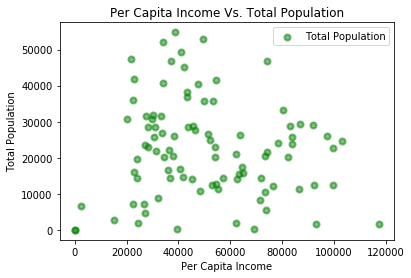

In [9]:
plt.scatter(primary_data["Per Capita Income"], primary_data["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Total Population")
plt.xlabel("Per Capita Income")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

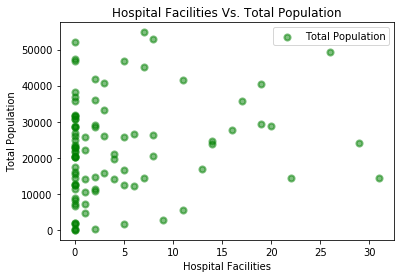

In [10]:
plt.scatter(primary_data["hospital facilities"], primary_data["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Hospital Facilities Vs. Total Population")
plt.xlabel("Hospital Facilities")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

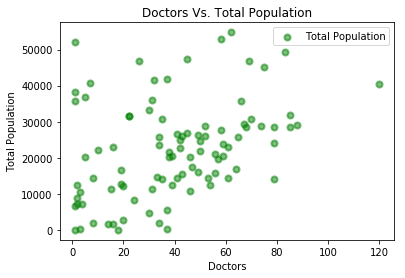

In [11]:
plt.scatter(primary_data["doctors"], primary_data["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Doctors Vs. Total Population")
plt.xlabel("Doctors")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.savefig("Doctors_Vs_Total_Population.png")

plt.show()

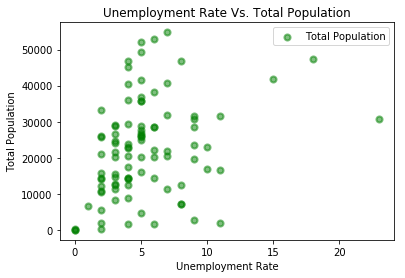

In [12]:
plt.scatter(primary_data["Unemployment Rate"], primary_data["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Unemployment Rate Vs. Total Population")
plt.xlabel("Unemployment Rate")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

In [13]:
plt.scatter(primary_data["Percent Insured"], primary_data["Total Population"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Percent Insured Vs. Total Population")
plt.xlabel("Percent Insured")
plt.ylabel("Total Population")

plt.legend(loc= "upper right")

plt.show()

KeyError: 'Percent Insured'

In [ ]:
plt.scatter(primary_data["Per Capita Income"], primary_data["hospital facilities"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Hospital Facilities")
plt.xlabel("Per Capita Income")
plt.ylabel("Hospital Facilities")

plt.legend(loc= "upper right")

plt.savefig("Per_Capita_Income_Vs_Hospital_Facilities.png")

plt.show()

In [ ]:
plt.scatter(primary_data["Per Capita Income"], primary_data["doctors"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Doctors")
plt.xlabel("Per Capita Income")
plt.ylabel("Doctors")

plt.legend(loc= "upper right")

plt.show()

In [ ]:
plt.scatter(primary_data["Per Capita Income"], primary_data["Unemployment Rate"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Unemployment Rate")
plt.xlabel("Per Capita Income")
plt.ylabel("Unemployment Rate")

plt.legend(loc= "upper right")

plt.savefig("Per_Capita_Income_Vs_Unemployment_Rate.png")

plt.show()

In [ ]:
plt.scatter(primary_data["Per Capita Income"], primary_data["Percent Insured"], color = "green", marker = "o", alpha = 0.5, linewidth = 2.1)
plt.title("Per Capita Income Vs. Percent Insured")
plt.xlabel("Per Capita Income")
plt.ylabel("Percent Insured")

plt.legend(loc= "upper right")

plt.savefig("Per_Capita_Income_Vs_Percent_Insured.png")

plt.show()